**# Partie 2:**
# dans cette étape, nous allons faire le traitement des données a savoir:
# - le nettoyag des vides
# - le remplacement des Nan et des 0 
# - le calcule des moy,max, min, mode et mediane pour voir avec quoi faire les remplacement
# - calcule des % des vides par features et en decider si supprimer ou remplacer

In [ ]:
#importation des librairies pour la gestion des données
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
#chargement des features préparées durant la partie 1
features = pd.read_csv("features.csv")

In [ ]:
features.head()

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,...,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie,oil prices,stock index,index price,exchange_rate
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,...,0.019253,0.045556,0.0,0.0,1.0,NaN,21.59,NASDAQ,168.61,1.0
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,...,0.027031,0.074765,0.0,0.0,1.0,NaN,31.77,NASDAQ,203.15,1.0
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,...,0.042586,0.004765,1.0,0.0,1.0,1.0,28.52,NASDAQ,188.98,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,...,0.039132,0.038889,1.0,0.0,1.0,1.0,26.19,NASDAQ,285.43,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,...,0.021354,0.050000,1.0,0.0,1.0,1.0,25.88,NASDAQ,248.89,1.0


In [ ]:
#verfication si y a des valeurs manquantes
features.isnull().values.any()

True

In [ ]:
#verification des nombres de valeurs manquantes
features.isnull().sum().sum()

232

In [ ]:
#verification des nombres des valeurs manquantes par feature
features.isnull().sum()

unique_id                0
country                  0
year                     0
inflationrate            0
gdppercent               0
percapitaincome          1
unemploymentrate         0
MoyInflation             0
Moyemployment            0
MoyGdpPercent            0
diffinflatrate           0
diffuneployrate          0
diffgdppercent           0
situation_inflation      1
situation_chommage       4
situation_gdp            5
bonne_economie         167
oil prices               0
stock index              0
index price             52
exchange_rate            2
dtype: int64

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   inflationrate        369 non-null    float64
 4   gdppercent           369 non-null    float64
 5   percapitaincome      368 non-null    float64
 6   unemploymentrate     369 non-null    float64
 7   MoyInflation         369 non-null    float64
 8   Moyemployment        369 non-null    float64
 9   MoyGdpPercent        369 non-null    float64
 10  diffinflatrate       369 non-null    float64
 11  diffuneployrate      369 non-null    float64
 12  diffgdppercent       369 non-null    float64
 13  situation_inflation  368 non-null    float64
 14  situation_chommage   365 non-null    float64
 15  situation_gdp        364 non-null    flo

In [ ]:
len(features)

369

In [ ]:
#connaitre le % des valeurs manquantes sur l'ensemble des features
features.isnull().sum().sum()/(369*22)*100

2.857846760285785

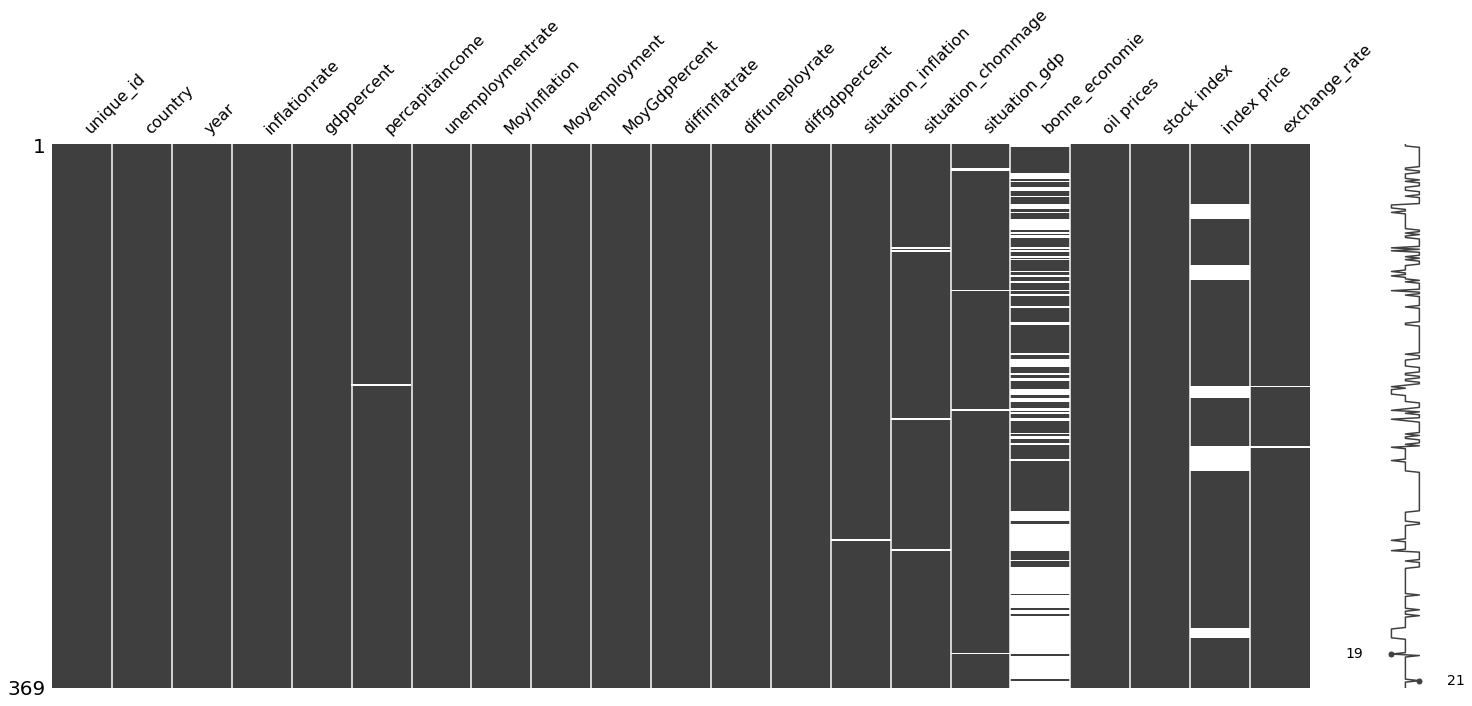

In [ ]:
#pour shematiser l'ensemble des valeurs manquantes sur un graphique
msno.matrix(features)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   inflationrate        369 non-null    float64
 4   gdppercent           369 non-null    float64
 5   percapitaincome      368 non-null    float64
 6   unemploymentrate     369 non-null    float64
 7   MoyInflation         369 non-null    float64
 8   Moyemployment        369 non-null    float64
 9   MoyGdpPercent        369 non-null    float64
 10  diffinflatrate       369 non-null    float64
 11  diffuneployrate      369 non-null    float64
 12  diffgdppercent       369 non-null    float64
 13  situation_inflation  368 non-null    float64
 14  situation_chommage   365 non-null    float64
 15  situation_gdp        364 non-null    flo

In [ ]:
# connaitre le max, min, mean, mode et median de chaque features pour remplacement des valeurs manquantes
features.columns

Index(['unique_id', 'country', 'year', 'inflationrate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'MoyInflation', 'Moyemployment',
       'MoyGdpPercent', 'diffinflatrate', 'diffuneployrate', 'diffgdppercent',
       'situation_inflation', 'situation_chommage', 'situation_gdp',
       'bonne_economie', 'oil prices', 'stock index', 'index price',
       'exchange_rate'],
      dtype='object')

In [ ]:
features.inflationrate.max()

0.24

In [ ]:
features.inflationrate.min()

-0.04

In [ ]:
features.inflationrate.mean()

0.04174846625766871

In [ ]:
features.inflationrate.mode()

0    0.02
dtype: float64

In [ ]:
features.inflationrate.median()

0.03

# **Phase de nettoyage et remplacement des Nan par des valeurs adequates**

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   inflationrate        369 non-null    float64
 4   gdppercent           369 non-null    float64
 5   percapitaincome      368 non-null    float64
 6   unemploymentrate     369 non-null    float64
 7   MoyInflation         369 non-null    float64
 8   Moyemployment        369 non-null    float64
 9   MoyGdpPercent        369 non-null    float64
 10  diffinflatrate       369 non-null    float64
 11  diffuneployrate      369 non-null    float64
 12  diffgdppercent       369 non-null    float64
 13  situation_inflation  368 non-null    float64
 14  situation_chommage   365 non-null    float64
 15  situation_gdp        364 non-null    flo

In [ ]:
#1-Copier l'unique id
df_temp=features[['unique_id']].copy()

In [ ]:
#2-Copier country
country= features[['unique_id','country']].copy()
df_temp['country']=country['country']

In [ ]:
#3-Copier year
year=features[['unique_id','year']].copy()
df_temp['year']=year['year']

In [ ]:
#4-Copier inflationrate
inflationrate=features[['unique_id','inflationrate']].copy()
df_temp['inflationrate']=inflationrate['inflationrate']


In [ ]:
#5-Copier gdppercent
gdppercent=features[['unique_id','gdppercent']].copy()
df_temp['gdppercent']=gdppercent['gdppercent']

In [ ]:
#6-Copier percapitaincome 
percapitaincome=features[['unique_id','percapitaincome']].copy()
df_temp['percapitaincome']=percapitaincome['percapitaincome']
df_temp['percapitaincome'].fillna(df_temp['percapitaincome'].mean(),inplace=True)



In [ ]:
#7-Copier unemploymentrate
unemploymentrate=features[['unique_id','unemploymentrate']].copy()
df_temp['unemploymentrate']=unemploymentrate['unemploymentrate']

In [ ]:
#8-Copier MoyInflation
MoyInflation=features[['unique_id','MoyInflation']].copy()
df_temp['MoyInflation']=MoyInflation['MoyInflation']

In [ ]:
#9-Copier Moyemployment
Moyemployment=features[['unique_id','Moyemployment']].copy()
df_temp['Moyemployment']=Moyemployment['Moyemployment']

In [ ]:
#10-Copier MoyGdpPercent
MoyGdpPercent=features[['unique_id','MoyGdpPercent']].copy()
df_temp['MoyGdpPercent']=MoyGdpPercent['MoyGdpPercent']

In [ ]:
#11- Copier  diffinflatrate
diffinflatrate=features[['unique_id','diffinflatrate']].copy()
df_temp['diffinflatrate']=diffinflatrate['diffinflatrate']

In [ ]:
#12-Copier diffuneployrate
diffuneployrate=features[['unique_id','diffuneployrate']].copy()
df_temp['diffuneployrate']=diffuneployrate['diffuneployrate']


In [ ]:
#13-Copier diffgdppercent
diffgdppercent=features[['unique_id','diffgdppercent']].copy()
df_temp['diffgdppercent']=diffgdppercent['diffgdppercent']


In [ ]:
#14-Copier situation_inflation
situation_inflation=features[['unique_id','situation_inflation']].copy()
df_temp['situation_inflation']=situation_inflation['situation_inflation']
df_temp['situation_inflation'].fillna(df_temp['situation_inflation'].mean(),inplace=True)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   inflationrate        369 non-null    float64
 4   gdppercent           369 non-null    float64
 5   percapitaincome      369 non-null    float64
 6   unemploymentrate     369 non-null    float64
 7   MoyInflation         369 non-null    float64
 8   Moyemployment        369 non-null    float64
 9   MoyGdpPercent        369 non-null    float64
 10  diffinflatrate       369 non-null    float64
 11  diffuneployrate      369 non-null    float64
 12  diffgdppercent       369 non-null    float64
 13  situation_inflation  369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


In [ ]:
#15-Copier situation_chommage       
situation_chommage=features[['unique_id','situation_chommage']].copy()
df_temp['situation_chommage']=situation_chommage['situation_chommage']
df_temp['situation_chommage'].fillna(df_temp['situation_chommage'].mean(),inplace=True)

In [ ]:
#16-Copier situation_gdp
situation_gdp=features[['unique_id','situation_gdp']].copy()
df_temp['situation_gdp']=situation_gdp['situation_gdp']
df_temp['situation_gdp'].fillna(df_temp['situation_gdp'].mean(),inplace=True)

In [ ]:
#17-Remplacer les vides de mauvaise_economie par des 0
bonne_economie=features[['unique_id','bonne_economie']].copy()
df_temp['bonne_economie']=bonne_economie['bonne_economie']
df_temp['bonne_economie'].fillna(0,inplace=True)


In [ ]:
#19 Copier oil prices
oil_prices=features[['unique_id','oil prices']].copy()
df_temp['oil prices']=oil_prices['oil prices']


In [ ]:
#20 Copier stock index
stock_index=features[['unique_id','stock index']].copy()
df_temp['stock index']=stock_index['stock index']


In [ ]:
#-21 Remplacer les vides d'index price par 0(pas de donnees)
index_price=features[['unique_id','index price']].copy()
df_temp['index price']=index_price['index price']
df_temp['index price'].fillna(0,inplace=True)


In [ ]:
#-22 Remplacer les vides d'exchange_rate par la moyenne des 5 annees de chaque pays
exchange_rate=features[['unique_id','exchange_rate']].copy()
df_temp['exchange_rate']=exchange_rate['exchange_rate']
df_temp['exchange_rate'][164:169].fillna(df_temp['exchange_rate'][164:169].mean(),inplace=True)
df_temp['exchange_rate'][205:210].fillna(df_temp['exchange_rate'][205:210].mean(),inplace=True)


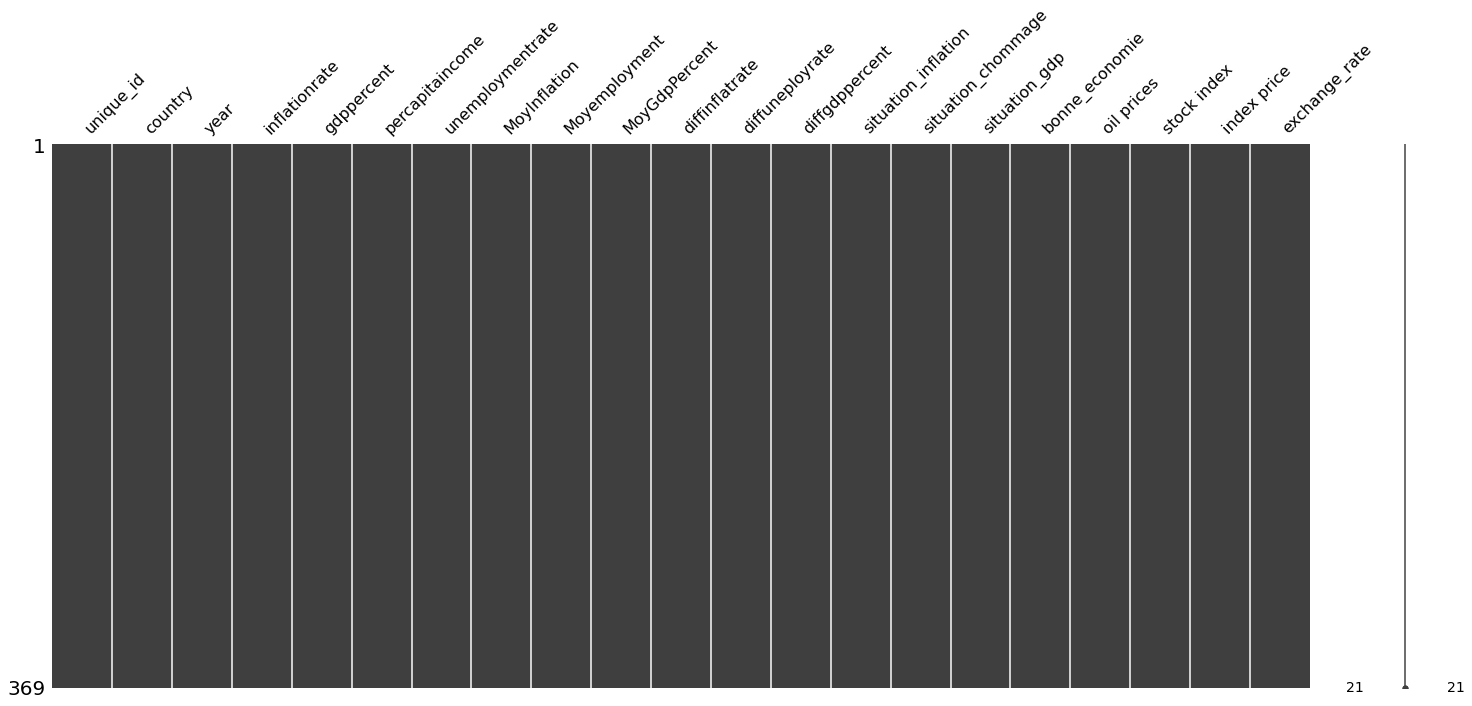

In [ ]:
#verfication isuelle de fichier features pour s'assurer que le nettoyage est fini
msno.matrix(df_temp)

In [ ]:
df_temp.head()

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,...,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie,oil prices,stock index,index price,exchange_rate
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,...,0.019253,0.045556,0.0,0.0,1.0,0.0,21.59,NASDAQ,168.61,1.0
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,...,0.027031,0.074765,0.0,0.0,1.0,0.0,31.77,NASDAQ,203.15,1.0
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,...,0.042586,0.004765,1.0,0.0,1.0,1.0,28.52,NASDAQ,188.98,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,...,0.039132,0.038889,1.0,0.0,1.0,1.0,26.19,NASDAQ,285.43,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,...,0.021354,0.050000,1.0,0.0,1.0,1.0,25.88,NASDAQ,248.89,1.0


In [ ]:
#sauvgarder l'ensemble des données dans un fichier csv pour l'utilisation dans la prochaine étape
df_temp.to_csv("features_finales.csv",index=False)

In [ ]:
df_temp.head(50)

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,...,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie,oil prices,stock index,index price,exchange_rate
0,12575.0_0.11,United States of America,1980.0,0.140000,0.090000,12575.0,0.07,0.104833,0.050747,0.044444,...,0.019253,0.045556,0.0,0.0,1.000000,0.0,21.59,NASDAQ,168.61,1.00
1,13976.0_0.14,United States of America,1981.0,0.100000,0.120000,13976.0,0.08,0.091500,0.052969,0.045235,...,0.027031,0.074765,0.0,0.0,1.000000,0.0,31.77,NASDAQ,203.15,1.00
2,14434.0_0.13,United States of America,1982.0,0.060000,0.040000,14434.0,0.10,0.080194,0.057414,0.035235,...,0.042586,0.004765,1.0,0.0,1.000000,1.0,28.52,NASDAQ,188.98,1.00
3,15544.0_0.11,United States of America,1983.0,0.030000,0.090000,15544.0,0.10,0.066861,0.060868,0.051111,...,0.039132,0.038889,1.0,0.0,1.000000,1.0,26.19,NASDAQ,285.43,1.00
4,17121.0_0.12,United States of America,1984.0,0.040000,0.110000,17121.0,0.08,0.059083,0.058646,0.060000,...,0.021354,0.050000,1.0,0.0,1.000000,1.0,25.88,NASDAQ,248.89,1.00
5,18237.0_0.11,United States of America,1985.0,0.040000,0.070000,18237.0,0.07,0.047972,0.057535,0.045556,...,0.012465,0.024444,1.0,0.0,1.000000,1.0,24.09,NASDAQ,290.25,1.00
6,19071.0_0.08,United States of America,1986.0,0.020000,0.060000,19071.0,0.07,0.042611,0.057535,0.048889,...,0.012465,0.011111,1.0,0.0,1.000000,1.0,12.51,NASDAQ,366.97,1.00
7,20039.0_0.08,United States of America,1987.0,0.040000,0.060000,20039.0,0.06,0.051500,0.072101,0.061111,...,-0.012101,-0.001111,1.0,1.0,0.000000,1.0,15.40,NASDAQ,402.57,1.00
8,21417.0_0.09,United States of America,1988.0,0.040000,0.080000,21417.0,0.05,0.060000,0.068768,0.072222,...,-0.018768,0.007778,1.0,1.0,1.000000,1.0,12.58,NASDAQ,374.43,1.00
9,22857.0_0.08,United States of America,1989.0,0.050000,0.080000,22857.0,0.05,0.067778,0.064323,0.045556,...,-0.014323,0.034444,1.0,1.0,1.000000,1.0,15.86,NASDAQ,437.80,1.00
